## Electron Microscopy Particle Segmentation

U-Net is a convolutional neural network (CNN) architecture that is widely used for image segmentation tasks, particularly in the field of biomedical image analysis.

#### Imports:

In [4]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import albumentations as A
from keras.utils import Sequence
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
import segmentation_models as sm
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

Segmentation Models: using `tf.keras` framework.


In [1]:
def resize(input_image, input_mask):
   input_image = tf.image.resize(input_image, (128, 128), method="nearest")
   input_mask = tf.image.resize(input_mask, (128, 128), method="nearest")

   return input_image, input_mask

In [2]:
def augment(input_image, input_mask):
   if tf.random.uniform(()) > 0.5:
       # Random flipping of the image and mask
       input_image = tf.image.flip_left_right(input_image)
       input_mask = tf.image.flip_left_right(input_mask)

   return input_image, input_mask

In [3]:
def normalize(input_image, input_mask):
   input_image = tf.cast(input_image, tf.float32) / 255.0
   input_mask -= 1
   return input_image, input_mask

In [4]:
def load_image_train(datapoint):
   input_image = datapoint["image"]
   input_mask = datapoint["segmentation_mask"]
   input_image, input_mask = resize(input_image, input_mask)
   input_image, input_mask = augment(input_image, input_mask)
   input_image, input_mask = normalize(input_image, input_mask)

   return input_image, input_mask

def load_image_test(datapoint):
   input_image = datapoint["image"]
   input_mask = datapoint["segmentation_mask"]
   input_image, input_mask = resize(input_image, input_mask)
   input_image, input_mask = normalize(input_image, input_mask)

   return input_image, input_mask

In [ ]:
train_dataset = dataset["train"].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = dataset["test"].map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

## Leave

#### Setting up the data:

In [12]:
train_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_images"
train_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_segmaps"

In [7]:
!mkdir val_images
!mkdir val_segmaps
!mkdir test_images
!mkdir test_segmaps
!mkdir train_images
!mkdir train_segmaps

In [8]:
val_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_images"
val_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_segmaps"

test_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_images"
test_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_segmaps"


In [13]:
# Images
data_dir = train_images_dir

# Get the list of image file names
image_files = os.listdir(data_dir)

# Set the random seed for reproducibility
random.seed(42)

# Split the image files into train, test, and validation sets
train_files, testval_files = train_test_split(image_files, test_size=0.2, random_state=42)
test_files, val_files = train_test_split(testval_files, test_size=0.5, random_state=42)

# Define the output directories for the train, test, and validation datasets
train_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_images"
test_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_images"
val_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_images"

# Create the train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Move the train images to the train directory
for file_name in train_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(train_dir, file_name))

# Move the test images to the test directory
for file_name in test_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(test_dir, file_name))

# Move the validation images to the validation directory
for file_name in val_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(val_dir, file_name))


In [14]:
# Segmaps
data_dir = train_maps_dir

# Get the list of image file names
image_files = os.listdir(data_dir)

# Set the random seed for reproducibility
random.seed(42)

# Split the image files into train, test, and validation sets
train_files, testval_files = train_test_split(image_files, test_size=0.2, random_state=42)
test_files, val_files = train_test_split(testval_files, test_size=0.5, random_state=42)

# Define the output directories for the train, test, and validation datasets
train_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_segmaps"
test_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_segmaps"
val_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_segmaps"

# Create the train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Move the train images to the train directory
for file_name in train_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(train_dir, file_name))

# Move the test images to the test directory
for file_name in test_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(test_dir, file_name))

# Move the validation images to the validation directory
for file_name in val_files:
    os.rename(os.path.join(data_dir, file_name), os.path.join(val_dir, file_name))


In [27]:
train_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_images"
train_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/Conf_segmaps"

images = np.array(os.listdir(train_images_dir), dtype = object)
maps = np.array(os.listdir(train_maps_dir), dtype = object)

print(f"There are {len(images)} train images")
print(f"There are {len(maps)} train masks")

There are 57 train images
There are 57 train masks


In [28]:
val_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_images"
val_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/val_segmaps"

val_images = np.array(os.listdir(val_images_dir), dtype = object)
val_maps = np.array(os.listdir(val_maps_dir), dtype = object)

print(f"There are {len(val_images)} of val images")
print(f"There are {len(val_maps)} of val masks")

There are 13 of val images
There are 13 of val masks


In [29]:
test_images_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_images"
test_maps_dir = "/Users/omachrekar/My Work/Artificial Intelligence Projects/OmEMS/test_segmaps"

test_images = np.array(os.listdir(test_images_dir), dtype = object)
test_maps = np.array(os.listdir(test_maps_dir), dtype = object)

print(f"There are {len(test_images)} of test images")
print(f"There are {len(test_maps)} of test masks")

There are 13 of test images
There are 13 of test masks


#### Prepocessing:

In [30]:
# preproessing the images
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image /= 255.0  # normalize to [0,1] range
    return image

# preproessing the masks
def preprocess_mask(mask):
    mask = tf.image.decode_jpeg(mask, channels=1)
    mask = tf.image.resize(mask, [128, 128])
    mask /= 255.0  # normalize to [0,1] range
    return mask

# load and decode the images and masks
def load_and_preprocess_image_and_mask(image_filename, mask_filename):
    image = tf.io.read_file(train_images_dir + '/' + image_filename)
    mask = tf.io.read_file(train_maps_dir + '/' + mask_filename)
    return preprocess_image(image), preprocess_mask(mask)

In [31]:
# augment the images and masks
def augment(image, mask):
    image = tf.image.random_flip_left_right(image)
    return image, mask

# create the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((images, maps))
train_dataset = train_dataset.map(load_and_preprocess_image_and_mask)
train_dataset = train_dataset.map(augment)
train_dataset = train_dataset.batch(32)

# create the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_maps))
val_dataset = val_dataset.map(load_and_preprocess_image_and_mask)
val_dataset = val_dataset.batch(32)

# create the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_maps))
test_dataset = test_dataset.map(load_and_preprocess_image_and_mask)
test_dataset = test_dataset.batch(32)

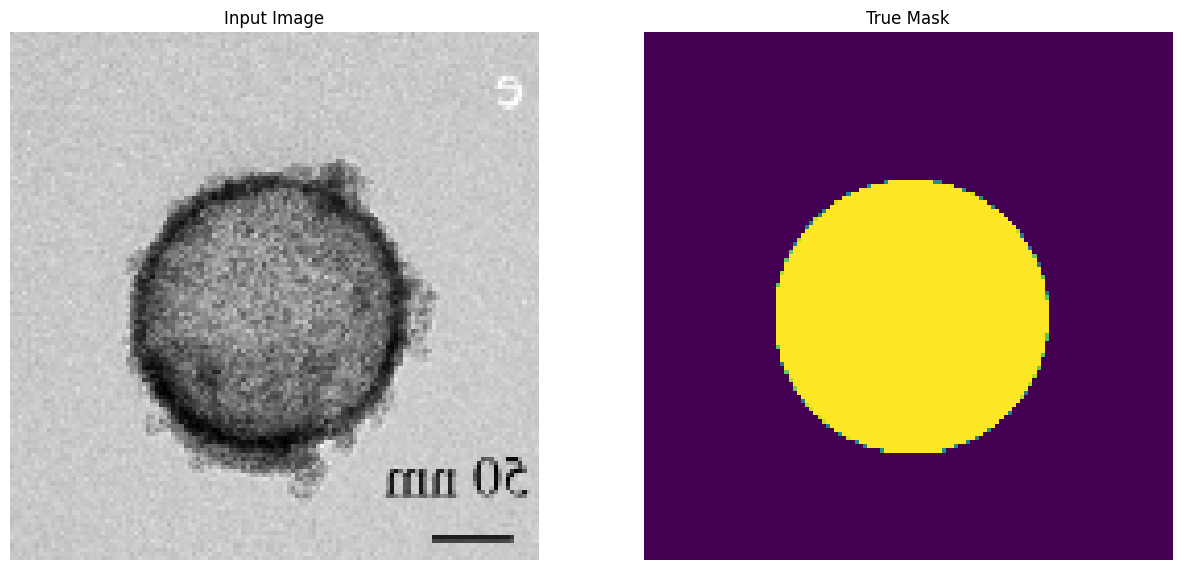

In [33]:
# show the images and masks
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# show the images and masks
for image, mask in train_dataset.take(1):
    sample_image, sample_mask = image[0], mask[0]
    display([sample_image, sample_mask])

#### Model Definition:

In [34]:
sm.set_framework('tf.keras')

In [35]:
BACKBONE = 'efficientnetb3'
ACTIVATION = 'sigmoid'
BATCH_SIZE = 32
NUM_CLASSES = 1
LR = 1e-4
EPOCHS = 20

preprocess_input = sm.get_preprocessing(BACKBONE)

In [36]:
model = sm.Unet(BACKBONE, classes=NUM_CLASSES, activation=ACTIVATION)

In [37]:
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
model.compile(tf.keras.optimizers.legacy.Adam(LR), total_loss, [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)])

In [38]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

In [39]:
history = model.fit(
    train_dataset,  
    epochs=EPOCHS, 
    callbacks=lr_schedule, 
    validation_data=val_dataset, 
    verbose=1,
)

Epoch 1/20
2/2 [==============================] - 11s 3s/step - loss: 0.9567 - iou_score: 0.2452 - f1-score: 0.3927 - val_loss: 1.4387 - val_iou_score: 0.2837 - val_f1-score: 0.4420 - lr: 1.0000e-04
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 0.9322 - iou_score: 0.2544 - f1-score: 0.4045 - val_loss: 1.2486 - val_iou_score: 0.2845 - val_f1-score: 0.4430 - lr: 1.1220e-04
Epoch 3/20
2/2 [==============================] - 5s 2s/step - loss: 0.8949 - iou_score: 0.2654 - f1-score: 0.4183 - val_loss: 1.1330 - val_iou_score: 0.2860 - val_f1-score: 0.4447 - lr: 1.2589e-04
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.8682 - iou_score: 0.2731 - f1-score: 0.4277 - val_loss: 1.1648 - val_iou_score: 0.2883 - val_f1-score: 0.4476 - lr: 1.4125e-04
Epoch 5/20
2/2 [==============================] - 5s 2s/step - loss: 0.8173 - iou_score: 0.2825 - f1-score: 0.4392 - val_loss: 1.5629 - val_iou_score: 0.2893 - val_f1-score: 0.4487 - lr: 1.5849e-04
Epoch 6/2

Text(0.5, 1.0, 'Training and Validation F1 Score')

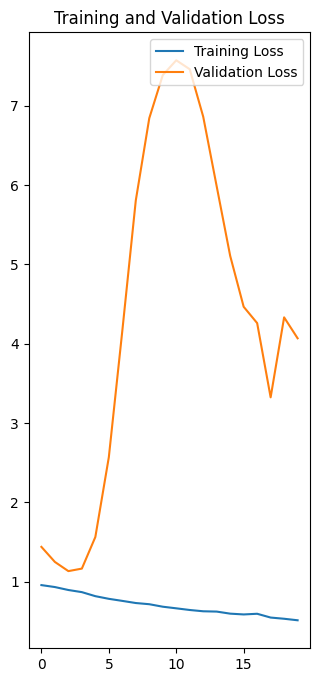

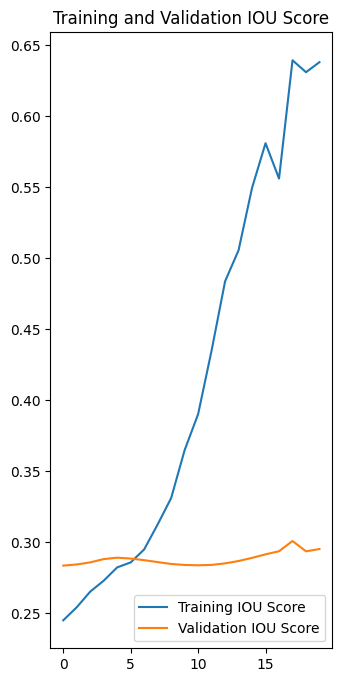

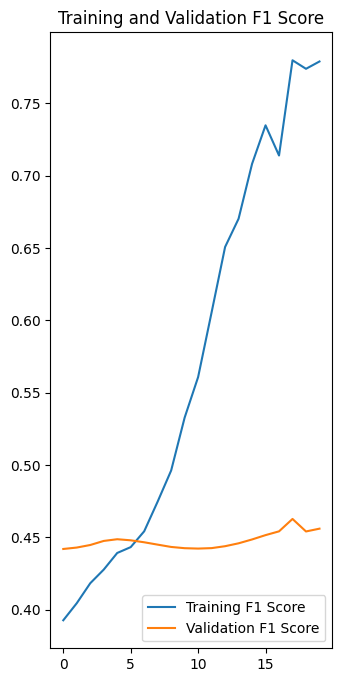

In [41]:
# print losses and metrics
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

iou_score = history.history['iou_score']
val_iou_score = history.history['val_iou_score']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(iou_score, label='Training IOU Score')
plt.plot(val_iou_score, label='Validation IOU Score')
plt.legend(loc='lower right')
plt.title('Training and Validation IOU Score')

f1_score = history.history['f1-score']
val_f1_score = history.history['val_f1-score']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(f1_score, label='Training F1 Score')
plt.plot(val_f1_score, label='Validation F1 Score')
plt.legend(loc='lower right')
plt.title('Training and Validation F1 Score')